In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Isolating Movie Budget

In [37]:
budget = pd.read_csv('data/movie_profit.csv')
productbudget = budget.copy(deep=True)
productbudget

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...
5777,Red 11,"$7,000",$0,$0
5778,Following,"$6,000","$48,482","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,A Plague So Pleasant,"$1,400",$0,$0


# Isolating Movie Genre

In [38]:
imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
MG = imdb_title_basics.copy(deep=True)
MG.drop(['original_title', 'start_year', 'runtime_minutes'], axis=1, inplace=True)

# MERGING MOVIES, BUDGET, AND GENRE 


In [47]:
MGB = pd.merge(MG, productbudget, on='primary_title')
MGB

,tconst,primary_title,genres,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,"Action,Animation,Comedy","$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,"Action,Adventure,Fantasy","$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,NaN,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,"Comedy,Mystery","$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,"Adventure,Drama,Romance","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...
3810,tt9678962,Fuel,"Documentary,Sport","$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Crime,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,"Action,Drama,Romance","$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Crime,"$40,000,000","$75,305,995","$124,823,094"


# ISOLATING RATINGS

In [40]:
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
MR = imdb_ratings.copy(deep=True)
MR.drop(['numvotes'], axis=1, inplace=True)
MR

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


# MERGING BUDGET, GENRES, RATINGS

In [41]:
PR = pd.merge(MR, MGB, on='tconst')
PR

,tconst,averagerating,primary_title,genres,production_budget,domestic_gross,worldwide_gross
0,tt1043726,4.2,The Legend of Hercules,"Action,Adventure,Fantasy","$70,000,000","$18,848,538","$58,953,319"
1,tt1094666,7.0,The Hammer,"Biography,Drama,Sport","$850,000","$442,638","$442,638"
2,tt1171222,5.1,Baggage Claim,Comedy,"$8,500,000","$21,569,509","$22,885,836"
3,tt1210166,7.6,Moneyball,"Biography,Drama,Sport","$50,000,000","$75,605,492","$111,300,835"
4,tt1212419,6.5,Hereafter,"Drama,Fantasy,Romance","$50,000,000","$32,746,941","$108,660,270"
...,...,...,...,...,...,...,...
2870,tt7201846,7.5,Edmond,"Comedy,Drama,History","$10,000,000","$131,719","$241,719"
2871,tt7385812,7.9,Closure,"Comedy,Drama","$100,000",$0,$0
2872,tt8043306,7.4,Teefa in Trouble,"Action,Comedy,Crime","$1,500,000",$0,"$98,806"
2873,tt8824064,7.3,Heroes,Documentary,"$400,000","$655,538","$655,538"


In [42]:
PR.duplicated().sum()

0

In [43]:
PR.isna().sum()

tconst               0
averagerating        0
primary_title        0
genres               8
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [44]:
PR.dropna()
PR = PR.sort_values(by=['production_budget'], ascending=False)
PR

,tconst,averagerating,primary_title,genres,production_budget,domestic_gross,worldwide_gross
208,tt6858500,7.6,Robin Hood,NaN,"$99,000,000","$30,824,628","$84,747,441"
2569,tt0955308,6.6,Robin Hood,"Action,Adventure,Drama","$99,000,000","$30,824,628","$84,747,441"
2055,tt4532826,5.3,Robin Hood,"Action,Adventure,Thriller","$99,000,000","$30,824,628","$84,747,441"
1293,tt2363363,6.3,Robin Hood,"Action,Drama","$99,000,000","$30,824,628","$84,747,441"
1397,tt2452042,7.1,The Peanuts Movie,"Adventure,Animation,Comedy","$99,000,000","$130,178,411","$250,091,610"
...,...,...,...,...,...,...,...
1635,tt2149137,2.2,Snow White: A Deadly Summer,Horror,"$1,000,000",$0,$0
2126,tt2388621,7.0,1982,Drama,"$1,000,000",$0,$0
2372,tt2400463,6.7,The Invitation,"Drama,Horror,Mystery","$1,000,000","$231,738","$354,836"
43,tt1015471,6.2,The Sisterhood of Night,"Drama,Mystery,Thriller","$1,000,000","$6,870","$6,870"


# VISUALIZATION

NameError: name 'fig' is not defined

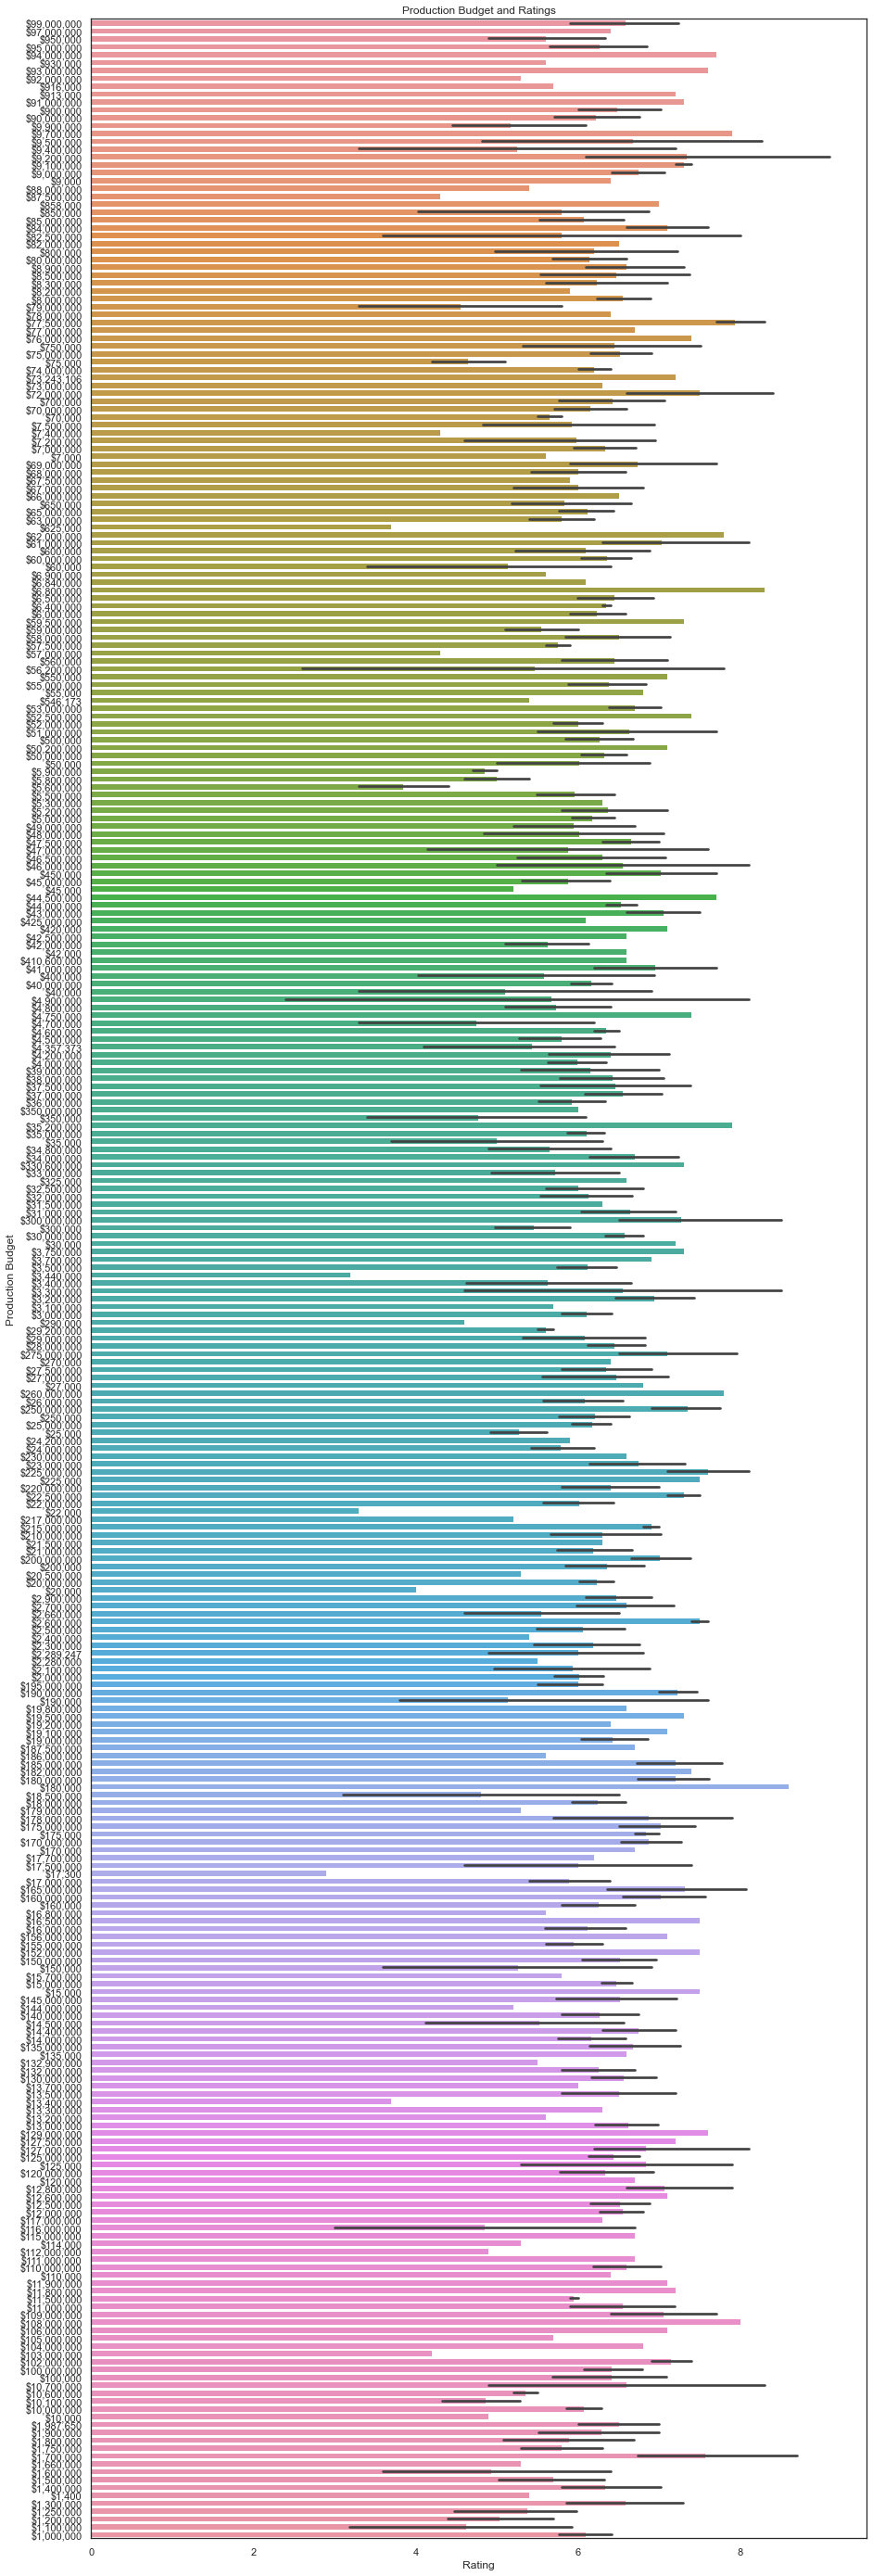

In [46]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 50))
sns.set_theme(style="white")
sns.barplot(x="averagerating", y="production_budget", data=PR)
ax.set_title('Production Budget and Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Production Budget')
fig.savefig('images/productionbudget.png');